In [3]:
# import libraries
import pandas as pd
import pandas_ta as ta
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
msft = yf.Ticker("MSFT")
data = msft.history(period="30Y")
data["log_ret"] = np.log(data.Close) - np.log(data.Close.shift(1))
data["RSILR"] =ta.rsi(data.log_ret, length=15)
data["EMAFLR"]=ta.ema(data.log_ret, length=25)
data["EMAMLR"]=ta.ema(data.log_ret, length=100)
data["EMASLR"]=ta.ema(data.log_ret, length=150)
data["log_ret_next"] = data["log_ret"].shift(-1)
data.dropna(inplace=True)
data.reset_index(inplace=True)
dates = data["Date"]
data.drop(["Volume", "Close", "Date", "Open", "High", "Low", "Dividends", "Stock Splits"], axis=1, inplace=True)
data

,log_ret,RSILR,EMAFLR,EMAMLR,EMASLR,log_ret_next
0,0.011063,50.708450,0.006683,0.003163,0.001564,0.026540
1,0.026540,52.857439,0.008211,0.003626,0.001894,-0.009570
2,-0.009570,47.662737,0.006843,0.003365,0.001743,0.007185
3,0.007185,50.100767,0.006869,0.003441,0.001815,0.025914
4,0.025914,52.737545,0.008334,0.003886,0.002134,-0.014052
...,...,...,...,...,...,...
7400,-0.010412,47.653414,0.000752,0.000469,0.000668,0.014871
7401,0.014871,52.737002,0.001838,0.000754,0.000856,-0.001745
7402,-0.001745,49.361470,0.001563,0.000704,0.000822,-0.005890
7403,-0.005890,48.531299,0.000989,0.000574,0.000733,0.003659


In [6]:
predictors = ["log_ret", "RSILR", "EMAFLR", "EMAMLR", "EMASLR"]
train = data.iloc[:-100]
test = data.iloc[-100:]

In [7]:
#create model
model = LinearRegression()

In [8]:
# fit the model
model.fit(train[predictors],train["log_ret_next"])

LinearRegression()

In [9]:
# make predictions
predictions = model.predict(test[predictors])

In [11]:
MSE = mean_squared_error(test["log_ret_next"], predictions)
print(MSE)
r2score = r2_score(test["log_ret_next"], predictions)
print(r2score)

0.0001916802687088327
0.00033856978550583783


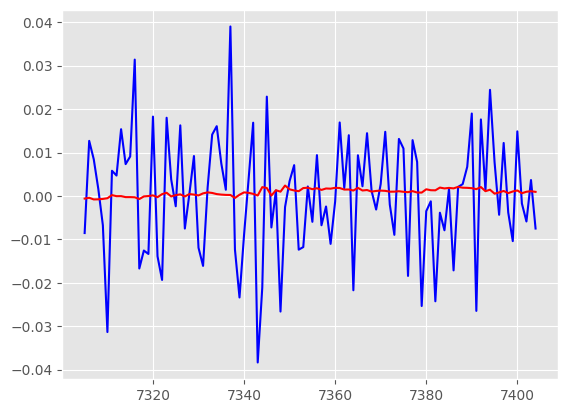

In [12]:
plt.style.use('default')
plt.style.use('ggplot')
plt.plot(test.index, test["log_ret_next"], color = "b")
plt.plot(test.index, predictions, color = "r")